# **PROJETO FINAL** 🚀

# **Navegando pela Inclusão: Internet e Computadores no Brasil**


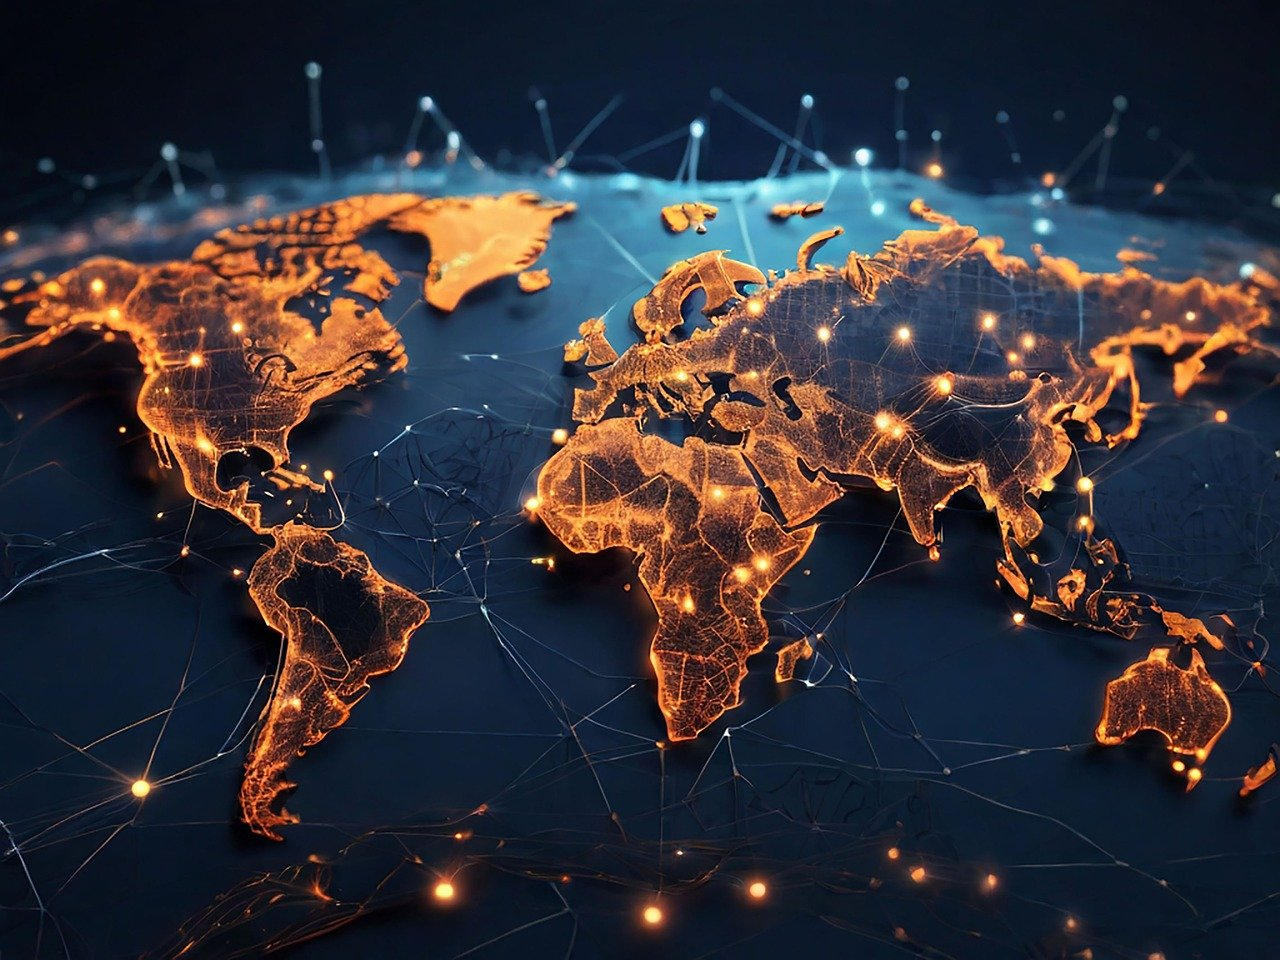


## **BASES DE DADOS** ✍

1. https://www.kaggle.com/datasets/sansuthi/gapminder-internet (Acesso a Internet no Mundo em 2022).


⚫ Colunas:

    ▶ País

    ▶ Renda Per Capta (produto interno bruno per capita em dolar constantes de 2000)

    ▶ Taxa Acesso Internet (usuarios da internet (por 100 pessoas))

    ▶ Taxa Urbanização (população urbana (% do total))


2. https://sidra.ibge.gov.br/tabela/7302 (Pesquisa Nacional por Amostra de Domicílios do IBGE em 2022 a 2023).

⚫ Colunas:

  
    ▶ Região (Norte, Sul, Suldeste, Nordeste, Centro-Oeste)

    ▶ Existencia de microcomputadores ou tablet no domicílio

    ▶ Total 2022 e 2023

    ▶ Total na Zona Urbana 2022 e 2023

    ▶ Total na Zona Rural 2022 e 2023


## **PERGUNTAS** 🌎

1. Qual o indice de acesso a internet por país?

2. Qual o indice de acesso a internet no Brasil?

3. Média de quantos computadores existem por domicilio em cada região do Brasil?

## **IMPORTANDO BIBLIOTECAS** ⏯

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **VISUALIZAÇÃO DAS BASES DE DADOS** 🔎


Vamos importar as bases e para entender melhor os dados que temos, a distribuição deles e seus tipos, vamos verificar suas colunas e tamanho.

### Base 1 🌎

* Esta base dados é sobre acesso a internet em 2022 e foi disponibilizado pela ONG Gapminder, através da plataforma Kangle. Esta ong é uma fundação sueca independente, sem afiliações políticas, religiosas ou econômicas.

In [ ]:
# Nomeando dataframe da ONG GAPMINDER
df_internet= pd.read_csv('gapminder_internet.csv', encoding='latin1')

# Visualização das dez primeiras linhas do dataframe
df_internet.head(10)

,country,incomeperperson,internetuserate,urbanrate
0,Afghanistan,NaN,3.654122,24.04
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
6,Argentina,10749.419240,36.000335,92.00
7,Armenia,1326.741757,44.001025,63.86
8,Aruba,NaN,41.800889,46.78
9,Australia,25249.986060,75.895654,88.74


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          213 non-null    object 
 1   incomeperperson  190 non-null    float64
 2   internetuserate  192 non-null    float64
 3   urbanrate        203 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


### Base 2 - IBGE 💻

Esta base é sobre a quantidade de notebooks e tablets no Brasil por domicilio.
A "tabela7302_nv" do IBGE estava em xlsx, para utilizar ela, subimos o arquivo no colab e convertemos em csv.


In [ ]:
# Carregue o arquivo XLSX
df_dispositivo_per_capto = pd.read_excel('tabela7302_nv.xlsx')

# Salvando como CSV
df_dispositivo_per_capto.to_csv('tabela7302_nv.csv', index=False)

In [ ]:
df_dispositivo_per_capto = pd.read_csv('tabela7302_nv.csv')

# Visualização do numero de linhas e colunas do dataframe
num_linhas = df_dispositivo_per_capto.shape[0]
num_colunas = df_dispositivo_per_capto.shape[1]
colunas = df_dispositivo_per_capto.columns.values

print(f"Número de linhas: {num_linhas} \n"
      f"Número de colunas: {num_colunas} \n"
      f"Colunas: {colunas} \n")

Número de linhas: 37 
Número de colunas: 8 
Colunas: ['Unnamed: 0' 'Unnamed: 1' '2022' 'Unnamed: 3' 'Unnamed: 4' '2023'
 'Unnamed: 6' 'Unnamed: 7'] 



In [ ]:
# Visualização das dez primeiras linhas do dataframe IBGE
df_dispositivo_per_capto.head(10)


,Unnamed: 0,Unnamed: 1,2022,Unnamed: 3,Unnamed: 4,2023,Unnamed: 6,Unnamed: 7
0,Brasil e Região,Existência de microcomputador ou tablet no dom...,Total_2022,Urbana_2022,Rural_2022,Total_2023,Urbana_2023,Rural_2023
1,Brasil,Total,75323,65831,9493,78322,68852,9470
2,Brasil,Havia microcomputador ou tablet,31887,30494,1392,32118,30810,1308
3,Brasil,Havia microcomputador,30271,29031,1240,30561,29397,1164
4,Brasil,Havia tablet,8090,7795,295,8118,7850,268
5,Brasil,Havia microcomputador e tablet,6475,6332,143,6560,6436,124
6,Brasil,Não havia microcomputador nem tablet,43437,35336,8100,46204,38042,8162
7,Norte,Total,5739,4592,1148,6024,4873,1151
8,Norte,Havia microcomputador ou tablet,1716,1627,89,1766,1675,92
9,Norte,Havia microcomputador,1606,1528,78,1672,1589,83


In [ ]:
# Quantidade de nulos por coluna IBGE
print("Valores nulos por coluna do dataframe:")
print(df_dispositivo_per_capto.isnull().sum())

Valores nulos por coluna do dataframe:
Unnamed: 0    0
Unnamed: 1    0
2022          0
Unnamed: 3    0
Unnamed: 4    0
2023          0
Unnamed: 6    0
Unnamed: 7    0
dtype: int64


## **LIMPEZA DOS DADOS** ✨

Agora que temos algumas informações sobre os datasets, podemos aplicar a limpeza. Para não prejudicar os dados originais e termos mais liberdade ao modifica-los, criamos dataframes para manipulação, utilizando a função `.copy()`.



### Base 1 🌎

In [ ]:
# Criação da copia do dataframe
dataframe_copia = df_internet.copy()

In [ ]:
# Renomeando as colunas existentes
df_internet_renomeado = df_internet.rename(columns={'country': 'País', 'incomeperperson': 'Renda_per_Capta',  'internetuserate': 'Taxa_Acesso_Internet',  'urbanrate': 'Taxa_Urbanização'})

colunas_atualizadas = df_internet_renomeado.columns.values

print(f"Colunas Atualizadas: {colunas_atualizadas}")

Colunas Atualizadas: ['País' 'Renda_per_Capta' 'Taxa_Acesso_Internet' 'Taxa_Urbanização']


In [ ]:
#contando a quantidade de valores nulos
df_internet_renomeado.isnull().sum()

,0
País,0
Renda_per_Capta,23
Taxa_Acesso_Internet,21
Taxa_Urbanização,10


In [ ]:
# Exclusão de Nulos
df_internet_renomeado.dropna(inplace=True)
print("Valores nulos removidos!")
df_internet_renomeado.isnull().sum()

Valores nulos removidos!


,0
País,0
Renda_per_Capta,0
Taxa_Acesso_Internet,0
Taxa_Urbanização,0


In [ ]:
# Exclusão de linhas duplicadas
df_internet_renomeado.drop_duplicates(inplace=True)
print(f"Linhas duplicadas: {df_internet_renomeado.duplicated().sum()}")

Linhas duplicadas: 0


In [ ]:
df_internet_renomeado

,País,Renda_per_Capta,Taxa_Acesso_Internet,Taxa_Urbanização
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
...,...,...,...,...
207,Venezuela,5528.363114,35.850437,93.32
208,Vietnam,722.807559,27.851822,27.84
210,"Yemen, Rep.",610.357367,12.349750,30.64
211,Zambia,432.226337,10.124986,35.42


In [ ]:
df_internet_renomeado.describe()

,Renda_per_Capta,Taxa_Acesso_Internet,Taxa_Urbanização
count,182.000000,182.000000,182.000000
mean,8283.350499,35.287862,55.896044
std,12509.740085,28.047810,23.629313
min,103.775857,0.210066,10.400000
25%,748.245151,9.924668,36.190000
50%,2553.496056,31.027196,57.230000
75%,9379.891166,55.973228,73.605000
max,81647.100030,95.638113,100.000000


### Base 2 - IBGE 💻



In [ ]:
dataframe_copia = df_dispositivo_per_capto.copy()

# Exclusão de linhas duplicadas
dataframe_copia.drop_duplicates(inplace=True)
print("Linhas duplicadas removidas!")


Linhas duplicadas removidas!


In [ ]:
# Renomeando as colunas existentes - IBGE
dataframe_renomeado = dataframe_copia.rename(columns={'Unnamed: 0': 'Localidade', 'Unnamed: 1': 'Dispositivo',  '2022': 'Total_2022',  'Unnamed: 3': 'Zonaurbana_2022', 'Unnamed: 4': 'Zonarural_2022', '2023': 'Total_2023', 'Unnamed: 6': 'Zonaurbana_2023', 'Unnamed: 7': 'Zonarural_2023' })

colunas_atualizadas = dataframe_renomeado.columns.values

print(f"Colunas Atualizadas: {colunas_atualizadas}")

Colunas Atualizadas: ['Localidade' 'Dispositivo' 'Total_2022' 'Zonaurbana_2022'
 'Zonarural_2022' 'Total_2023' 'Zonaurbana_2023' 'Zonarural_2023']


In [ ]:
#Exclusão de linha "do índice 0", onde supostamente estão nomeadas as colunas

dataframe_renomeado.drop(0, axis=0)
dataframe_renomeado. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Localidade       37 non-null     object
 1   Dispositivo      37 non-null     object
 2   Total_2022       37 non-null     object
 3   Zonaurbana_2022  37 non-null     object
 4   Zonarural_2022   37 non-null     object
 5   Total_2023       37 non-null     object
 6   Zonaurbana_2023  37 non-null     object
 7   Zonarural_2023   37 non-null     object
dtypes: object(8)
memory usage: 2.4+ KB


In [ ]:
#contando a quantidade de valores nulos
dataframe_renomeado.isnull().sum()

,0
Localidade,0
Dispositivo,0
Total_2022,0
Zonaurbana_2022,0
Zonarural_2022,0
Total_2023,0
Zonaurbana_2023,0
Zonarural_2023,0


In [ ]:
dataframe_renomeado

,Localidade,Dispositivo,Total_2022,Zonaurbana_2022,Zonarural_2022,Total_2023,Zonaurbana_2023,Zonarural_2023
0,Brasil e Região,Existência de microcomputador ou tablet no dom...,Total_2022,Urbana_2022,Rural_2022,Total_2023,Urbana_2023,Rural_2023
1,Brasil,Total,75323,65831,9493,78322,68852,9470
2,Brasil,Havia microcomputador ou tablet,31887,30494,1392,32118,30810,1308
3,Brasil,Havia microcomputador,30271,29031,1240,30561,29397,1164
4,Brasil,Havia tablet,8090,7795,295,8118,7850,268
5,Brasil,Havia microcomputador e tablet,6475,6332,143,6560,6436,124
6,Brasil,Não havia microcomputador nem tablet,43437,35336,8100,46204,38042,8162
7,Norte,Total,5739,4592,1148,6024,4873,1151
8,Norte,Havia microcomputador ou tablet,1716,1627,89,1766,1675,92
9,Norte,Havia microcomputador,1606,1528,78,1672,1589,83


## **ANÁLISE DOS DADOS** 📊



## 1. Qual o indice de acesso a internet por país?

* Informação Importante: Os dados da Gapminder são provenientes da União Internacional de Telecomunicações (UIT). A definição da UIT para uso da internet é: "Estar online ao menos uma vez nos últimos três meses". Isso difere significativamente de uma conexão constante. No entanto, de acordo com a Gapminder, esta é uma das pesquisas mais confiáveis na área.

In [ ]:
# Média de Acessos à Internet por País
df_indice_internet_pais = df_internet_renomeado.groupby('País')['Taxa_Acesso_Internet'].mean()

* Além de apresentar a quantidade de acessos por país, decidimos incluir a média desses acessos em um gráfico. Para uma visualização mais clara, organizamos os países de acordo com seus continentes.

In [ ]:
# Média de acesso a internet na America do Norte
print("O indice de acesso a internet nos Estados Unidos:" , df_indice_internet_pais['United States'])
print("O indice de acesso a internet no Canadá:" , df_indice_internet_pais['Canada'])
print("O indice de acesso a internet no México:" , df_indice_internet_pais['Mexico'])

O indice de acesso a internet nos Estados Unidos: 74.247572
O indice de acesso a internet no Canadá: 81.33839269
O indice de acesso a internet no México: 31.05001287


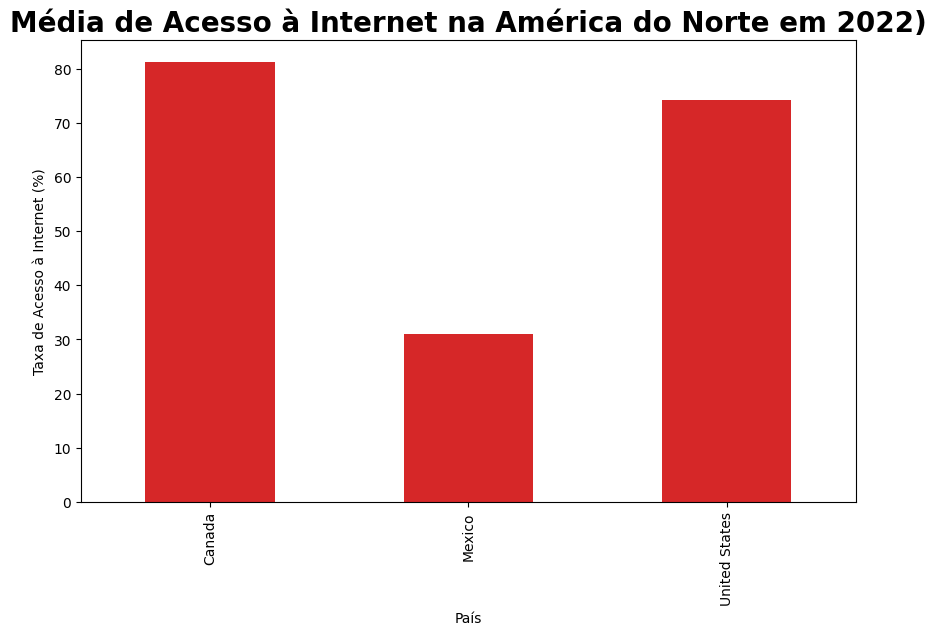

In [ ]:
# Grafico
paises_america_norte = ['United States', 'Canada', 'Mexico']

df_indice_internet_pais_america_norte = df_indice_internet_pais[df_indice_internet_pais.index.isin(paises_america_norte)]
df_indice_internet_pais_america_norte.plot(kind='bar', figsize=(10, 6), color='tab:red')

plt.title('Média de Acesso à Internet na América do Norte em 2022)', fontsize=20, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Taxa de Acesso à Internet (%)')
plt.show()

In [ ]:
# Média de acesso a internet na America do Sul
print("O indice de acesso a internet na Argentina:" , df_indice_internet_pais['Argentina'])
print("O indice de acesso a internet no Brasil:" , df_indice_internet_pais['Brazil'])
print("O indice de acesso a internet no Chile:" , df_indice_internet_pais['Chile'])
print("O indice de acesso a internet na Colômbia:" , df_indice_internet_pais['Colombia'])
print("O indice de acesso a internet no Equador:" , df_indice_internet_pais['Ecuador'])
print("O indice de acesso a internet no Paraguai:" , df_indice_internet_pais['Paraguay'])
print("O indice de acesso a internet no Peru:" , df_indice_internet_pais['Peru'])
print("O indice de acesso a internet no Uruguai:" , df_indice_internet_pais['Uruguay'])
print("O indice de acesso a internet na Venezuela:" , df_indice_internet_pais['Venezuela'])

O indice de acesso a internet na Argentina: 36.00033495
O indice de acesso a internet no Brasil: 40.650098
O indice de acesso a internet no Chile: 45.0
O indice de acesso a internet na Colômbia: 36.49987464
O indice de acesso a internet no Equador: 28.99947674
O indice de acesso a internet no Paraguai: 19.80168119
O indice de acesso a internet no Peru: 34.30060399
O indice de acesso a internet no Uruguai: 47.86746863
O indice de acesso a internet na Venezuela: 35.85043696


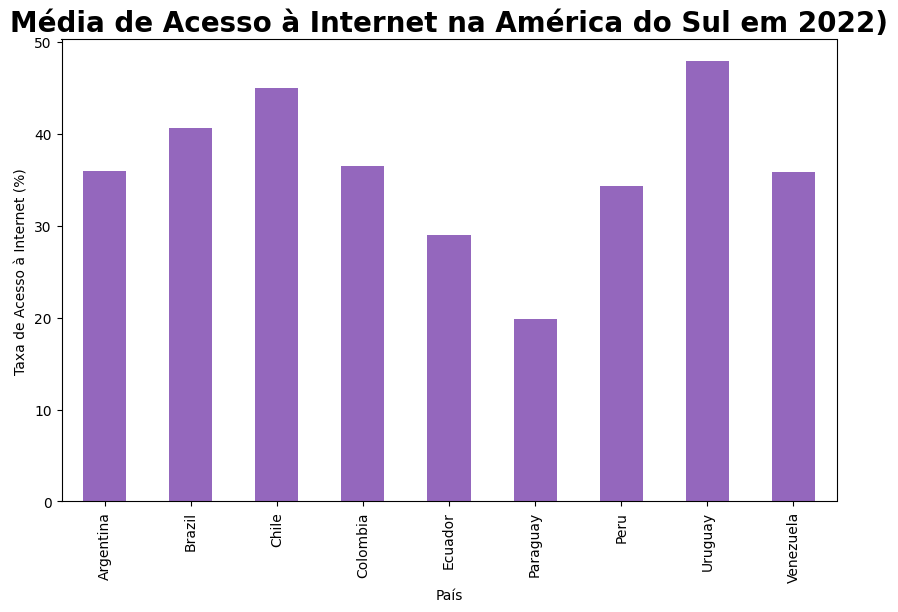

In [ ]:
# Grafico
paises_america_sul = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

df_indice_internet_pais_america_sul = df_indice_internet_pais[df_indice_internet_pais.index.isin(paises_america_sul)]
df_indice_internet_pais_america_sul.plot(kind='bar', figsize=(10, 6), color='tab:purple')

plt.title('Média de Acesso à Internet na América do Sul em 2022)', fontsize=20, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Taxa de Acesso à Internet (%)')
plt.show()

In [ ]:
# Média de acesso a internet na Europa
print("O indice de acesso a internet na Alemanha: " , df_indice_internet_pais['Germany'])
print("O indice de acesso a internet na França:" , df_indice_internet_pais['France'])
print("O indice de acesso a internet no Reino Unido: " , df_indice_internet_pais['United Kingdom'])
print("O indice de acesso a internet na Itália:" , df_indice_internet_pais['Italy'])
print("O indice de acesso a internet na Espanha:" , df_indice_internet_pais['Spain'])
print("O indice de acesso a internet em Portugal:" , df_indice_internet_pais['Portugal'])

O indice de acesso a internet na Alemanha:  82.52689791
O indice de acesso a internet na França: 77.49861935
O indice de acesso a internet no Reino Unido:  84.73170475
O indice de acesso a internet na Itália: 53.7402166
O indice de acesso a internet na Espanha: 65.80855367
O indice de acesso a internet em Portugal: 51.2804784


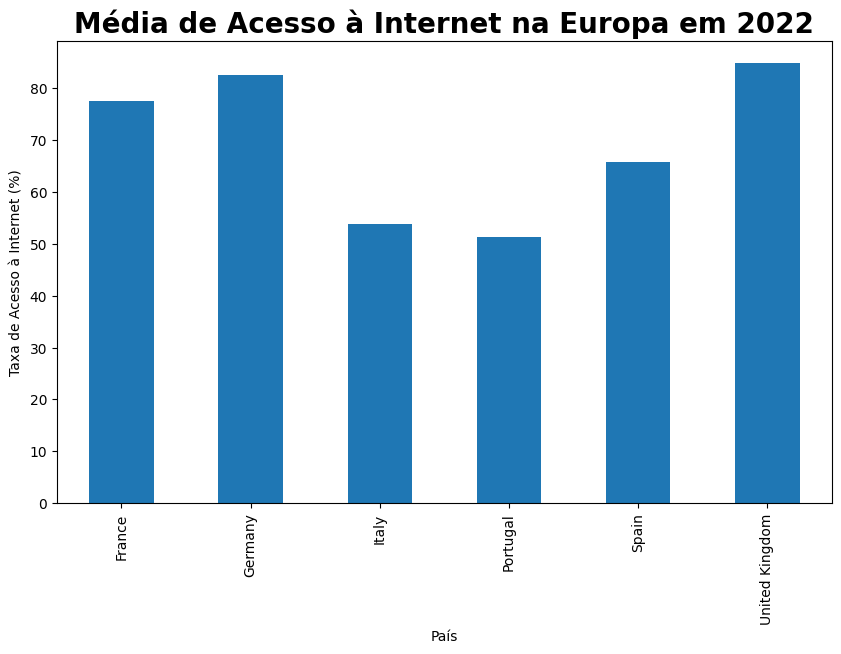

In [ ]:
# Grafico
paises_europa = ['Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 'Portugal']

df_indice_internet_paises_europa = df_indice_internet_pais[df_indice_internet_pais.index.isin(paises_europa)]
df_indice_internet_paises_europa.plot(kind='bar', figsize=(10, 6), color='tab:blue')

plt.title('Média de Acesso à Internet na Europa em 2022', fontsize=20, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Taxa de Acesso à Internet (%)')
plt.show()

In [ ]:
# Média de acesso a internet na Asia
print("O indice de acesso a internet na China: " , df_indice_internet_pais['China'])
print("O indice de acesso a internet na India:" , df_indice_internet_pais['India'])
print("O indice de acesso a internet no Japão:" , df_indice_internet_pais['Japan'])
print("O indice de acesso a internet nas Filipinas:" , df_indice_internet_pais['Philippines'])
print("O indice de acesso a internet no Vietnã:" , df_indice_internet_pais['Vietnam'])
print("O indice de acesso a internet na Tailândia:" , df_indice_internet_pais['Thailand'])


O indice de acesso a internet na China:  34.37778952
O indice de acesso a internet na India: 7.499995878
O indice de acesso a internet no Japão: 77.63853515
O indice de acesso a internet nas Filipinas: 24.99994585
O indice de acesso a internet no Vietnã: 27.85182156
O indice de acesso a internet na Tailândia: 21.20007177


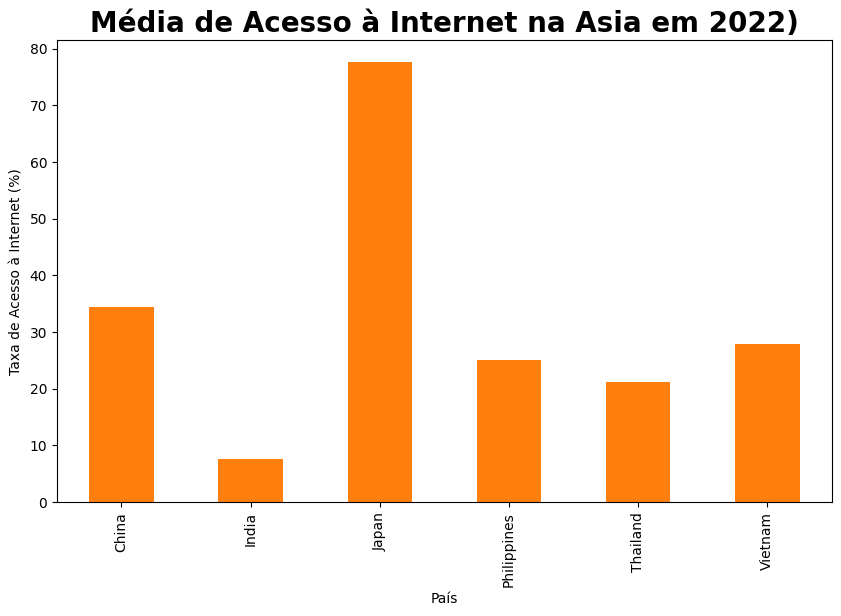

In [ ]:
# Grafico
paises_asia = ['China', 'India', 'Japan', 'Philippines', 'Vietnam', 'Thailand']

df_indice_internet_paises_asia = df_indice_internet_pais[df_indice_internet_pais.index.isin(paises_asia)]
df_indice_internet_paises_asia.plot(kind='bar', figsize=(10, 6), color='tab:orange')

plt.title('Média de Acesso à Internet na Asia em 2022)', fontsize=20, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Taxa de Acesso à Internet (%)')
plt.show()

In [ ]:
# Média de acesso a internet na Africa
print("O indice de acesso a internet no Egito:" , df_indice_internet_pais['Egypt'])
print("O indice de acesso a internet no Marrocos:" , df_indice_internet_pais['Morocco'])
print("O indice de acesso a internet no Senegal:" , df_indice_internet_pais['Senegal'])
print("O indice de acesso a internet no Togo:" , df_indice_internet_pais['Togo'])
print("O indice de acesso a internet na Tunísia:" , df_indice_internet_pais['Tunisia'])
print("O indice de acesso a internet em Zâmbia:" , df_indice_internet_pais['Zambia'])


O indice de acesso a internet no Egito: 26.74002538
O indice de acesso a internet no Marrocos: 49.00063184
O indice de acesso a internet no Senegal: 15.99964999
O indice de acesso a internet no Togo: 5.379819715
O indice de acesso a internet na Tunísia: 36.56255296
O indice de acesso a internet em Zâmbia: 10.12498646


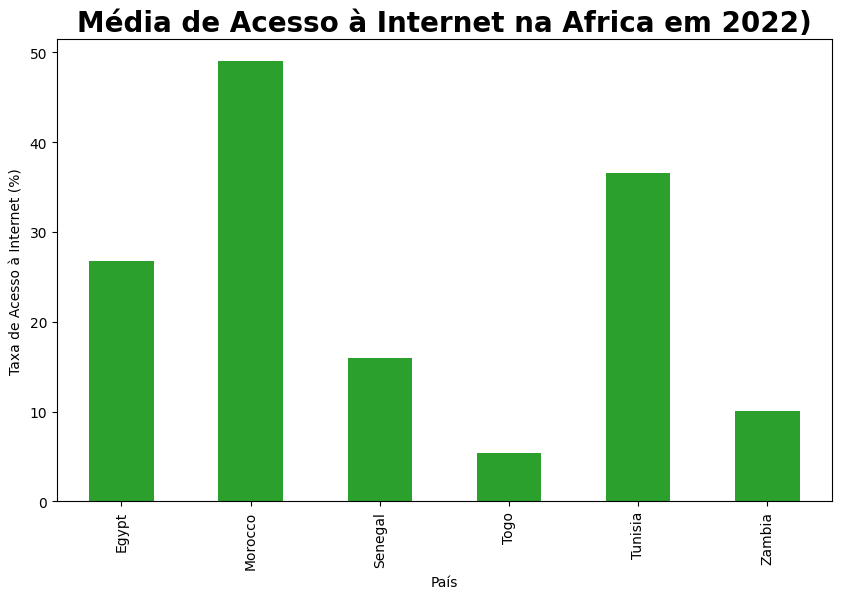

In [ ]:
# Grafico
paises_africa = ['Egypt', 'Morocco', 'Senegal', 'Togo', 'Tunisia', 'Zambia']
df_indice_internet_paises_africa = df_indice_internet_pais[df_indice_internet_pais.index.isin(paises_africa)]
df_indice_internet_paises_africa.plot(kind='bar', figsize=(10, 6), color='tab:green')

plt.title('Média de Acesso à Internet na Africa em 2022)', fontsize=20, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Taxa de Acesso à Internet (%)')
plt.show()

In [ ]:
# Média de acesso a internet na Oceania
print("O indice de acesso a internet na Austrália:" , df_indice_internet_pais['Australia'])
print("O indice de acesso a internet na Nova Zelândia:" , df_indice_internet_pais['New Zealand'])
print("O indice de acesso a internet em Fiji:" , df_indice_internet_pais['Fiji'])
print("O indice de acesso a internet no Salomão" , df_indice_internet_pais['Solomon Islands'])

O indice de acesso a internet na Austrália: 75.8956538
O indice de acesso a internet na Nova Zelândia: 83.00258425
O indice de acesso a internet em Fiji: 14.83073588
O indice de acesso a internet no Salomão 5.001375465


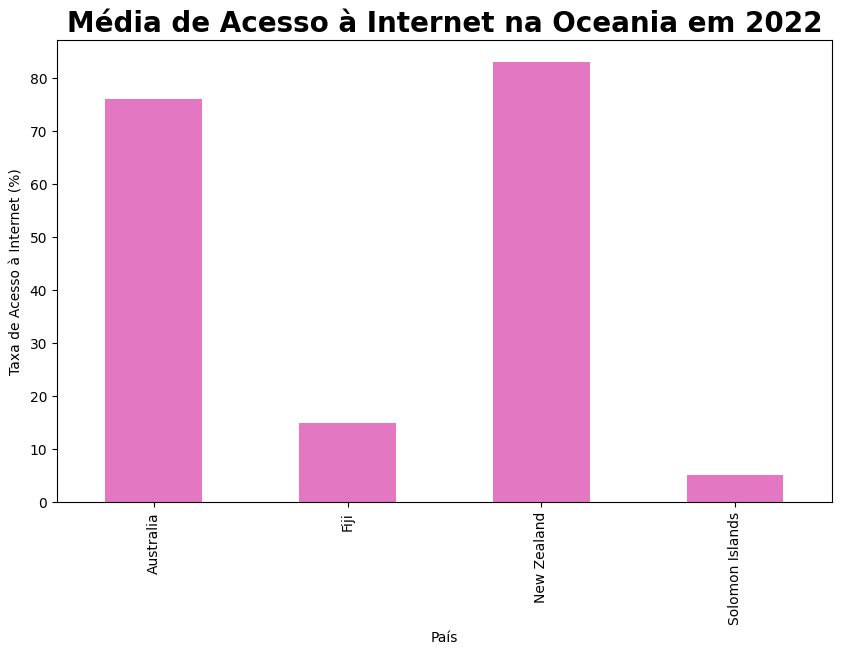

In [ ]:
# Grafico
paises_oceania = ['Australia', 'New Zealand', 'Fiji', 'Solomon Islands']
df_indice_internet_paises_oceania = df_indice_internet_pais[df_indice_internet_pais.index.isin(paises_oceania)]
df_indice_internet_paises_oceania.plot(kind='bar', figsize=(10, 6), color='tab:pink')

plt.title('Média de Acesso à Internet na Oceania em 2022', fontsize=20, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Taxa de Acesso à Internet (%)')
plt.show()

## Indicador: Porcentagem da População Mundial que usou internet em 2022

In [ ]:
# Convertendo as colunas para valor numérico
df_internet_renomeado['Taxa_Acesso_Internet'] = pd.to_numeric(df_internet_renomeado['Taxa_Acesso_Internet'])
df_internet_renomeado['Taxa_Urbanização'] = pd.to_numeric(df_internet_renomeado['Taxa_Urbanização'])

# Calculando a população mundial total e o número total de usuários de internet
populacao_mundial_total = df_internet_renomeado['Taxa_Urbanização'].sum()
usuarios_internet_total = df_internet_renomeado['Taxa_Acesso_Internet'].sum()

# Calculando a porcentagem da população mundial que usa internet
porcentagem_internet_mundial = (usuarios_internet_total / populacao_mundial_total) * 100

print(f"A porcentagem da população mundial que usa internet em 2022 é: {porcentagem_internet_mundial:.2f}%")

A porcentagem da população mundial que usa internet em 2022 é: 63.13%


Em 2022, apenas 63,13% da população mundial usava a internet. Isso significa que apenas cerca de dois terços da população global está conectada à rede mundial de computadores. Embora possa parecer um número alto, ainda há uma grande parte da população que permanece offline, destacando disparidades no acesso à tecnologia e à informação e aprofundando o abismo social, sobretudo com o advento da inteligencia artificial.

# 2. Qual o indice de acesso a internet no Brasil?


In [ ]:
#Filtrar os dados do Brasil
df_brasil = df_internet_renomeado[df_internet_renomeado['País'] == 'Brazil']

# Calcular a média da taxa de acesso à internet no Brasil
media_acesso_internet_brasil = df_brasil['Taxa_Acesso_Internet'].mean()
populacao_brasil = df_brasil['Taxa_Urbanização'].sum()

# Calcular a porcentagem da população do Brasil que usa internet
porcentagem_internet_brasil = (media_acesso_internet_brasil / populacao_brasil) * 100

print(f"A média de acesso à internet no Brasil em 2022 era de: {media_acesso_internet_brasil:.2f}%")


A média de acesso à internet no Brasil em 2022 era de: 40.65%


"Em 2022, a média de acesso à internet no Brasil era de apenas 40,65%. Isso significa que menos da metade da população brasileira estava conectada à rede, destacando uma significativa desigualdade no acesso à tecnologia e à informação em comparação com países com maior percentual de usuários online.

Apesar desses dados terem quase dois anos, essa disparidade pode não ser percebida devido ao uso generalizado de celulares. No entanto, o acesso a um computador e a um aparelho celular são coisas distintas. Por exemplo, é muito mais difícil aprender a analisar dados ou programar em Python utilizando apenas um celular.

Pensando nisso reunimos dados de quantos computadores e tablets existem por domicilio no Brasil.

# 3. Qual a média de computadores por domicílio em cada região no Brasil?

In [ ]:
# Computadores por Domicílio em Cada Região do Brasil em 2022

df_estados = dataframe_renomeado[dataframe_renomeado["Localidade"].isin(["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"])]

df_estados['Total_2022'] = pd.to_numeric(df_estados['Total_2022'], errors='coerce')

df_estados.groupby("Localidade")["Total_2022"].mean()
df_estados

<ipython-input-38-a61bb025629b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['Total_2022'] = pd.to_numeric(df_estados['Total_2022'], errors='coerce')


,Localidade,Dispositivo,Total_2022,Zonaurbana_2022,Zonarural_2022,Total_2023,Zonaurbana_2023,Zonarural_2023
7,Norte,Total,5739,4592,1148,6024,4873,1151
8,Norte,Havia microcomputador ou tablet,1716,1627,89,1766,1675,92
9,Norte,Havia microcomputador,1606,1528,78,1672,1589,83
10,Norte,Havia tablet,381,363,17,411,393,18
11,Norte,Havia microcomputador e tablet,271,265,6,316,307,9
12,Norte,Não havia microcomputador nem tablet,4024,2965,1059,4258,3198,1059
13,Nordeste,Total,19632,15164,4468,20691,16082,4609
14,Nordeste,Havia microcomputador ou tablet,5481,5100,381,5448,5074,374
15,Nordeste,Havia microcomputador,4989,4684,305,4961,4657,304
16,Nordeste,Havia tablet,1447,1337,110,1438,1339,99


<ipython-input-39-9149563f2b17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['Total_2022'] = pd.to_numeric(df_estados['Total_2022'], errors='coerce')


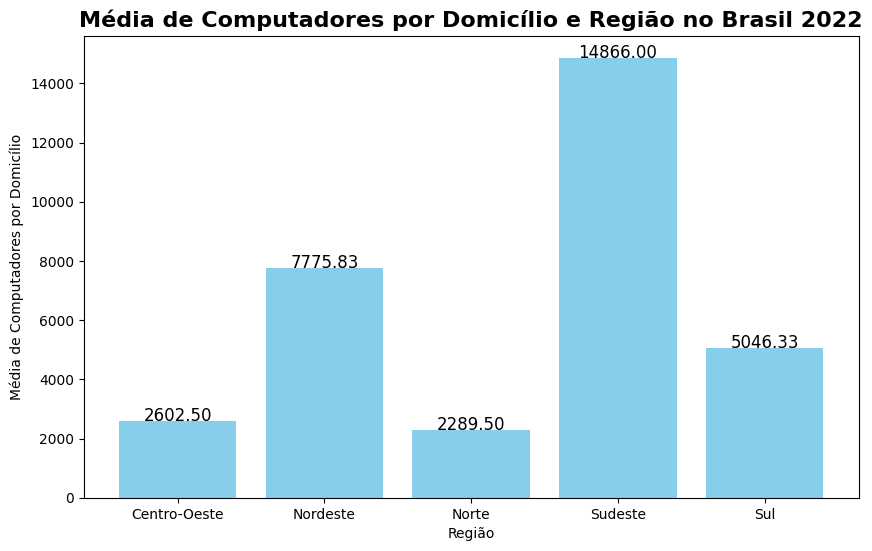

In [ ]:
# Media de Computadores por Domicílio em Cada Região do Brasil em 2022

df_estados = dataframe_renomeado[dataframe_renomeado["Localidade"].isin(["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"])]

df_estados['Total_2022'] = pd.to_numeric(df_estados['Total_2022'], errors='coerce')

# Calculando a média por localidade
media_computadores = df_estados.groupby("Localidade")["Total_2022"].mean().reset_index()

# Grafico
plt.figure(figsize=(10, 6))
plt.title('Média de Computadores por Domicílio e Região no Brasil 2022', fontsize=16, fontweight='bold')
plt.bar(media_computadores['Localidade'], media_computadores['Total_2022'], color='skyblue')
plt.xlabel('Região')
plt.ylabel('Média de Computadores por Domicílio')

for index, value in enumerate(media_computadores['Total_2022']): plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=12)
plt.show()


In [ ]:
print(media_computadores)

     Localidade    Total_2022
0  Centro-Oeste   2602.500000
1      Nordeste   7775.833333
2         Norte   2289.500000
3       Sudeste  14866.000000
4           Sul   5046.333333


Em 2022, sobre a média de computadores nas diferentes regiões também revela -se desigualdades. A região Sudeste mais uma vez se destaca, com uma média de 14.866 computadores, evidenciando uma maior disseminação de tecnologia.
O Nordeste aparece em segundo lugar, com uma média de 7.775,83 computadores, seguido pelo Sul com 5.046,33 computadores.
O Centro-Oeste e o Norte apresentam médias menores, com 2.602,5 e 2.289,5 computadores, respectivamente. Esses números ilustram as diferenças no acesso à tecnologia entre as regiões, com o Sudeste sendo a mais privilegiada em termos de disponibilidade de computadores.

<ipython-input-54-8f6123b0023e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['Total_2023'] = pd.to_numeric(df_estados['Total_2023'], errors='coerce')


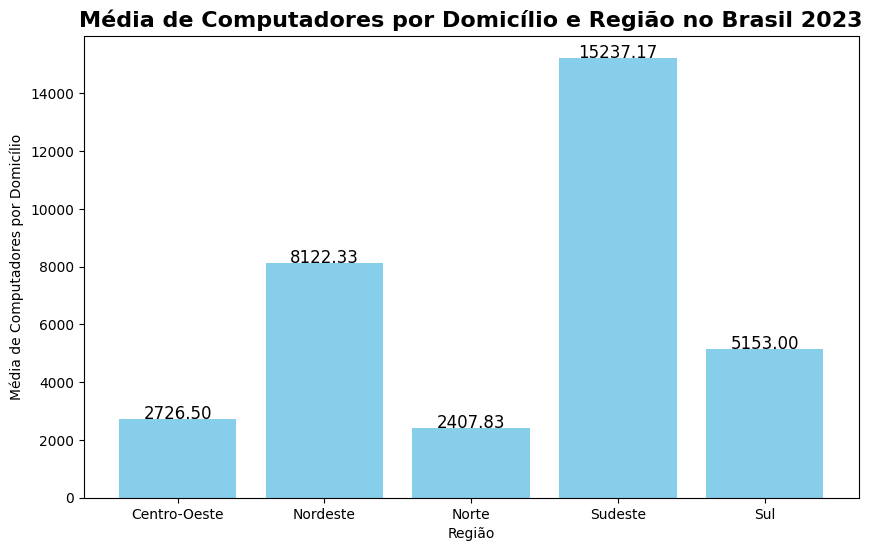

In [ ]:
# Media de Computadores por Domicílio em Cada Região do Brasil em 2023

df_estados = dataframe_renomeado[dataframe_renomeado["Localidade"].isin(["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"])]

df_estados['Total_2023'] = pd.to_numeric(df_estados['Total_2023'], errors='coerce')

# Calculando a média por localidade
media_computadores = df_estados.groupby("Localidade")["Total_2023"].mean().reset_index()

# Grafico
plt.figure(figsize=(10, 6))
plt.title('Média de Computadores por Domicílio e Região no Brasil 2023', fontsize=16, fontweight='bold')
plt.bar(media_computadores['Localidade'], media_computadores['Total_2023'], color='skyblue')
plt.xlabel('Região')
plt.ylabel('Média de Computadores por Domicílio')

for index, value in enumerate(media_computadores['Total_2023']): plt.text(index, value + 0.1, f'{value:.2f}', ha='center', fontsize=12)
plt.show()

In [ ]:
print(media_computadores)

     Localidade    Total_2023
0  Centro-Oeste   2726.500000
1      Nordeste   8122.333333
2         Norte   2407.833333
3       Sudeste  15237.166667
4           Sul   5153.000000


Em 2023, as médias de computadores nas diferentes regiões do Brasil mostraram apenas pequenas alterações em relação ao ano anterior. Esse cenário indica que, embora tenha havido algumas mudanças, as desigualdades no acesso à tecnologia entre as regiões brasileiras persistem.

Para analisar os domicílios sem computador ou tablet, filtramos os dados mais recentes de 2023.

<ipython-input-60-1ac4c4b179f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estados['Total_2023'] = pd.to_numeric(df_estados['Total_2023'], errors='coerce')


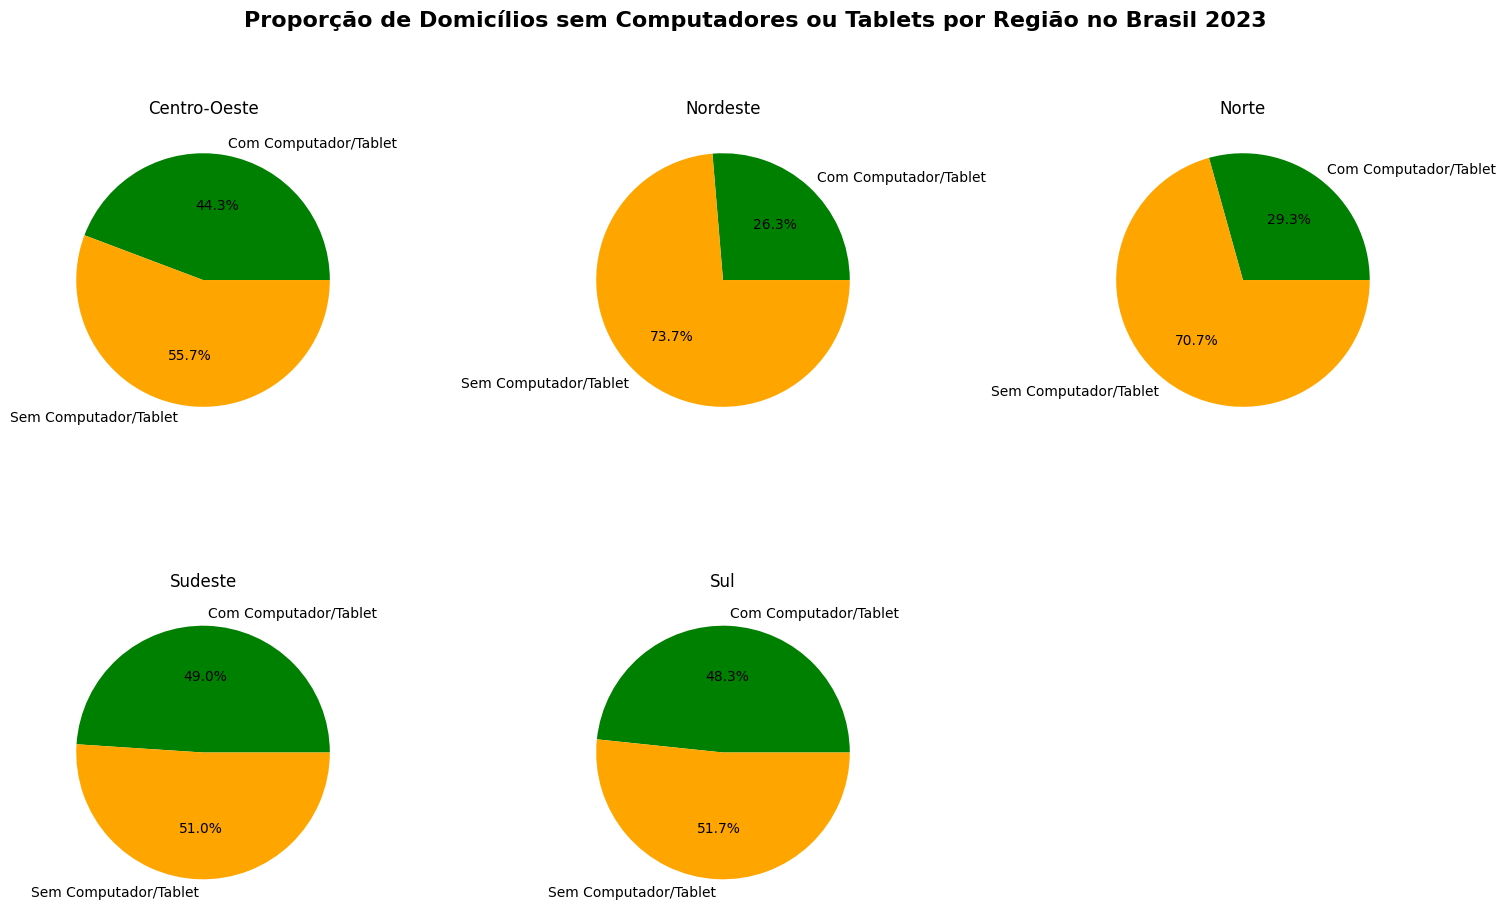

In [ ]:
# Domicilios sem Computador ou Tablet

df_estados = dataframe_renomeado[dataframe_renomeado["Localidade"].isin(["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"])]

df_estados['Total_2023'] = pd.to_numeric(df_estados['Total_2023'], errors='coerce')

# Filtrando as linhas onde não havia computadores ou tablets
df_nao_computador_tablet = df_estados[df_estados['Dispositivo'] == 'Não havia microcomputador nem tablet']

# Calculando o total de domicílios sem computadores ou tablets por localidade
total_nao_computador_tablet = df_nao_computador_tablet.groupby("Localidade")["Total_2023"].sum().reset_index()

# Calculando o total de domicílios por localidade
total_domicilios = df_estados[df_estados['Dispositivo'] == 'Total'].groupby("Localidade")["Total_2023"].sum().reset_index()

# Merge
df_merged = pd.merge(total_domicilios, total_nao_computador_tablet, on="Localidade", suffixes=('_total', '_sem_computador'))

# Calculando domicílios sem computadores ou tablets
df_merged['Domicilios_sem_computador'] = df_merged['Total_2023_total'] - df_merged['Total_2023_sem_computador']

# Grafico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, ax in enumerate(axes[:5]):
    regiao = df_merged.iloc[i]['Localidade']
    valores = [df_merged.iloc[i]['Total_2023_total'] - df_merged.iloc[i]['Total_2023_sem_computador'], df_merged.iloc[i]['Total_2023_sem_computador']]
    ax.pie(valores, labels=['Com Computador/Tablet', 'Sem Computador/Tablet'], autopct='%1.1f%%', colors=['green', 'orange'])
    ax.set_title(regiao)
fig.delaxes(axes[5])
plt.suptitle('Proporção de Domicílios sem Computadores ou Tablets por Região no Brasil 2023', fontsize=16 , fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
print(df_merged)

     Localidade  Total_2023_total  Total_2023_sem_computador  \
0  Centro-Oeste              6230                       3473   
1      Nordeste             20691                      15244   
2         Norte              6024                       4258   
3       Sudeste             33792                      17246   
4           Sul             11584                       5984   

   Domicilios_sem_computador  
0                       2757  
1                       5447  
2                       1766  
3                      16546  
4                       5600  


Em 2023, a análise mostrou que muitas regiões do Brasil têm um número significativo de domicílios sem computador ou tablet. Isso evidencia desigualdades tecnológicas, especialmente em termos de impacto no desenvolvimento educacional e profissional. O que nos levou a questionar quem são as pessoas que estão efetivamente conseguindo trabalho na área de tecnologia.